In [234]:
import pandas as pd
import numpy as np
from matplotlib import pyplot, pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [235]:
data = datasets.load_boston()

C:\Users\nilsu\PycharmProjects\pythonProject9\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

QUESTION 1

In [236]:
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [237]:
housing_df.corr()['target']
# LSTAT are highly correlated with target value
# LSTAT's value is higher than other features

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
target     1.000000
Name: target, dtype: float64

In [238]:
X = housing_df[['LSTAT']]
y  = housing_df['target']

In [239]:
model = LinearRegression()

In [240]:
model.fit(X , y)

C:\Users\nilsu\PycharmProjects\pythonProject9\venv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [241]:
print(model.score(X,y)) #equation of the fitting line

0.5441462975864797


C:\Users\nilsu\PycharmProjects\pythonProject9\venv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


In [242]:
y_pred = model.predict(X)

C:\Users\nilsu\PycharmProjects\pythonProject9\venv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


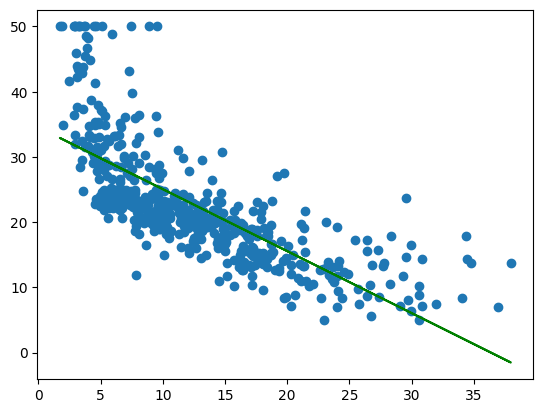

In [243]:
plt.plot(X, y_pred,color= "green")
pyplot.scatter(x=housing_df.LSTAT,y=housing_df.target)    # puts the points

QUESTION 2

In [244]:
lr = LinearRegression()
X=housing_df[['CRIM',	'ZN',	'INDUS', 'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=housing_df['target']
lr.fit(X,y)

C:\Users\nilsu\PycharmProjects\pythonProject9\venv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [245]:
print("Mean squared error: ",np.sum((lr.intercept_ + X @ lr.coef_ - y) **2)/(len(y)))

Mean squared error:  21.894831181729206


QUESTION 3

In [246]:
#Shuffle and split data
X_train, X_test, y_train, y_test = train_test_split(
    data['data'], data['target'], test_size=0.4,random_state=11, shuffle=True)


In [247]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.coef_,model.intercept_
y_pred = model.predict(X_test)

In [248]:
print("Score on the test data: ", model.score(X_train,y_train))

Score on the test data:  0.7474401373448025


In [249]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error (MSE): 23.85
